## T-Test

In [2]:
import plotly
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# генерим 2 разные выборки
data1 = np.random.normal(0, 1, size=10_000)
data2 = np.random.normal(2, 1, size=10_000)

In [4]:
x = np.linspace(-4, 4, 160)
y1 = stats.norm.pdf(x)
y2 = stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.show()

## Односторонний
Проведем односторонний T-test, что среднее первой выборки равно 0

In [6]:
from plotly.figure_factory import create_table

# mu0
true_mu = 0

# проводим одновыборочный Т-тест
onesample_results = stats.ttest_1samp(data1, true_mu)

# Визуализируем результаты
matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

onesample_table = create_table(matrix_onesample, index=True)
onesample_table

## Двусторонний
Проверяем равенство средних двух выборок

In [7]:
# Двухвыборочный Т-тест
twosample_results = stats.ttest_ind(data1, data2)

# Визуализируем результаты
matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = create_table(matrix_twosample, index=True)
twosample_table

## T-test для НЕнормального распределения
Есть убеждение, что для Т-теста исходные данные должны быть распределены нормально, однако это не так

В Т-тесте мы сравниваем средние, и по ЦПТ при достаточно больших выборках средние распределены нормально

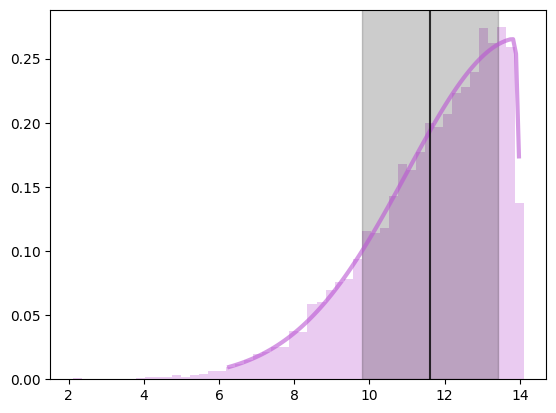

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Возьмем специально какое-то скошенное ненормальное распределение
alpha = 0.05
a = -50
loc = 14
scale = 3
x1 = np.linspace(stats.skewnorm.ppf(0.01, a, loc=loc, scale=scale), stats.skewnorm.ppf(0.99, a, loc=loc, scale=scale), 100)

# вот оно
skewed = stats.skewnorm.rvs(a, size=10000, loc=loc, scale=scale)

fig, ax = plt.subplots(1, 1)
ax.plot(x1, stats.skewnorm.pdf(x1, a, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='mediumorchid')
ax.hist(skewed, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='mediumorchid')
ax.axvline(np.mean(skewed), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(skewed)-np.std(skewed),0), 2*np.std(skewed), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

Посчитаем FPR для Т-теста для такого распределения

In [10]:
# исходная выборка из скошенного распределения
skewed = stats.skewnorm.rvs(a, size=10000, loc=loc, scale=scale)

# размер подвыборки, который мы берем
samp_size = 10

results = []
for i in range(10000):

    # берем 2 подвыборки заданного размера
    sample1 = np.random.choice(skewed, samp_size)
    sample2 = np.random.choice(skewed, samp_size)

    # проводим Т-тест
    _, pval = stats.ttest_ind(sample1, sample2)

    # сравниваем p-value с alpha
    results.append(pval < alpha)

# Выводим FPR
print(sum(results) / len(results))

0.0496


FPR = 0.0496 < alpha = 0.05 => Т-тест работает корректно

### Экспоненциальное распределение
Проведем то же самое на экспоненциальном распределении

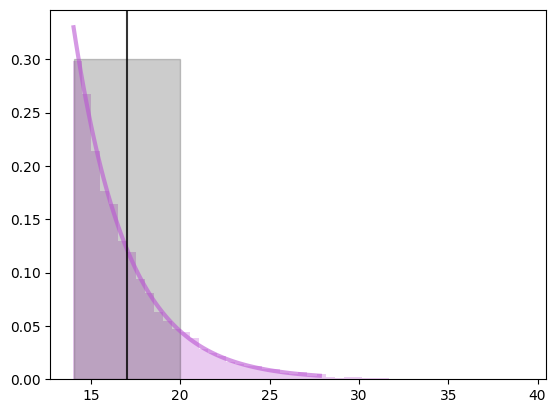

In [11]:
x1 = np.linspace(stats.expon.ppf(0.01, loc=loc, scale=scale), stats.expon.ppf(0.99, loc=loc, scale=scale), 100)
exponential = stats.expon.rvs(size=10000, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1)
ax.plot(x1, stats.expon.pdf(x1, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='mediumorchid')
ax.hist(exponential, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='mediumorchid')
ax.axvline(np.mean(exponential), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(exponential)-np.std(exponential),0), 2*np.std(exponential), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

plt.show()

In [12]:
samp_size = 10

results = []
for i in range(10000):
    sample1 = np.random.choice(exponential, samp_size)
    sample2 = np.random.choice(exponential, samp_size)
    _, pval = stats.ttest_ind(sample1, sample2)
    results.append(pval < alpha)
print(sum(results) / len(results))

0.0441


Снова FPR < 0.05 => критерий корректный

### Нормальное
И на нормальном распределении

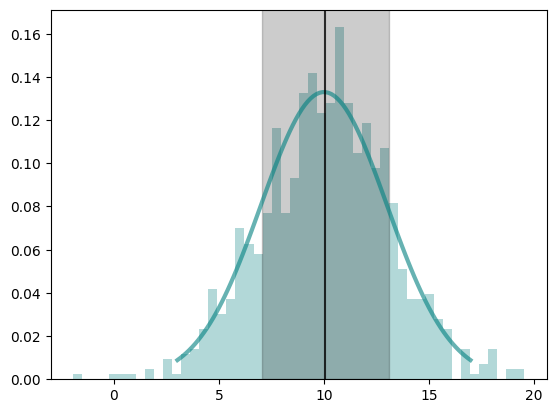

In [13]:
loc = 10
scale = 3
x2 = np.linspace(stats.norm.ppf(0.01, loc=loc, scale=scale), stats.norm.ppf(0.99, loc=loc, scale=scale), 100)
normal = stats.norm.rvs(size=1000, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1)
ax.plot(x2, stats.norm.pdf(x2, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='teal')
ax.hist(normal, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='teal')
ax.axvline(np.mean(normal), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(normal)-np.std(normal),0), 2*np.std(normal), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

In [14]:
samp_size = 10

results = []
for i in range(10000):
    sample1 = np.random.choice(normal, samp_size)
    sample2 = np.random.choice(normal, samp_size)
    _, pval = stats.ttest_ind(sample1, sample2)
    results.append(pval < 0.05)
print(sum(results) / len(results))

0.0548


### Mann Whitney

Про него тоже есть странности: про него пишут, что он проверяет разницу в медианах, на деле это не совсем так.  

Это ранговый тест, который проверяет разницу в распределениях (подробнее см. курс по прикладной статистике от Авито)


In [15]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

In [16]:
data1 = 5 * np.random.randn(1000) + 50 # среднее 50, дисперсия 25
data2 = 5 * np.random.randn(1000) + 51 # среднее 51, дисперсия 25

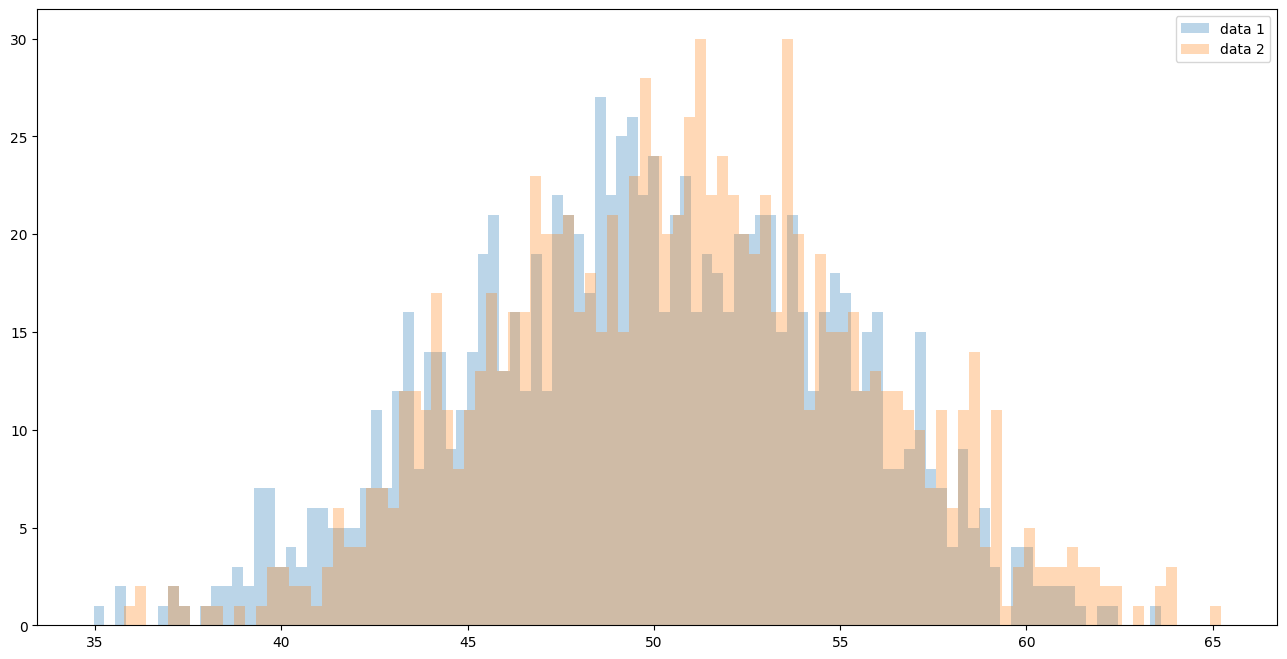

In [17]:
plt.figure(figsize=(16, 8))
plt.hist(data1, bins=100, alpha=0.3, label='data 1')
plt.hist(data2, bins=100, alpha=0.3, label= 'data 2')
plt.legend()
plt.show()

In [18]:
stat, p = mannwhitneyu(data1, data2)
print(f'Statistics={stat}, p={p}')
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=452114.0, p=0.0002086817897957682
Different distribution (reject H0)


Тут тест дал правильный ответ

Посмотрим на FPR

In [21]:
num_tests = 10000

In [20]:
counter_acc = 0
stats_same = []
for i in tqdm(range(num_tests)):

    # генерим 2 одинаковые выборки
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 50

    # проводим тест Манна-Уитни и сохраняем результат
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_same.append(stat)

# второе число - доля принятия альтернативной гипотезу, при условии что различий нет
# это вероятность ошибки первого рода
counter_acc, (num_tests - counter_acc) / num_tests

  0%|          | 0/10000 [00:00<?, ?it/s]

(np.int64(9507), np.float64(0.0493))

А теперь замерим ошибку 2 рода

In [22]:
counter_acc = 0
stats_diff = []
for i in tqdm(range(num_tests)):

    # генерим выборки с разными средними
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 51

    # проводим тест Манна-Уитни
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_diff.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [23]:
# первое число - доля принятия нулевой гипотезы при условии, что верна альтернативная
# это вероятность ошибки 2 рода

counter_acc / num_tests, num_tests - counter_acc

(np.float64(0.0084), np.int64(9916))

## Суть теста: найти такую статистику, в которой малейшее изменения в параметре приводят к сильным изменениям в статистике


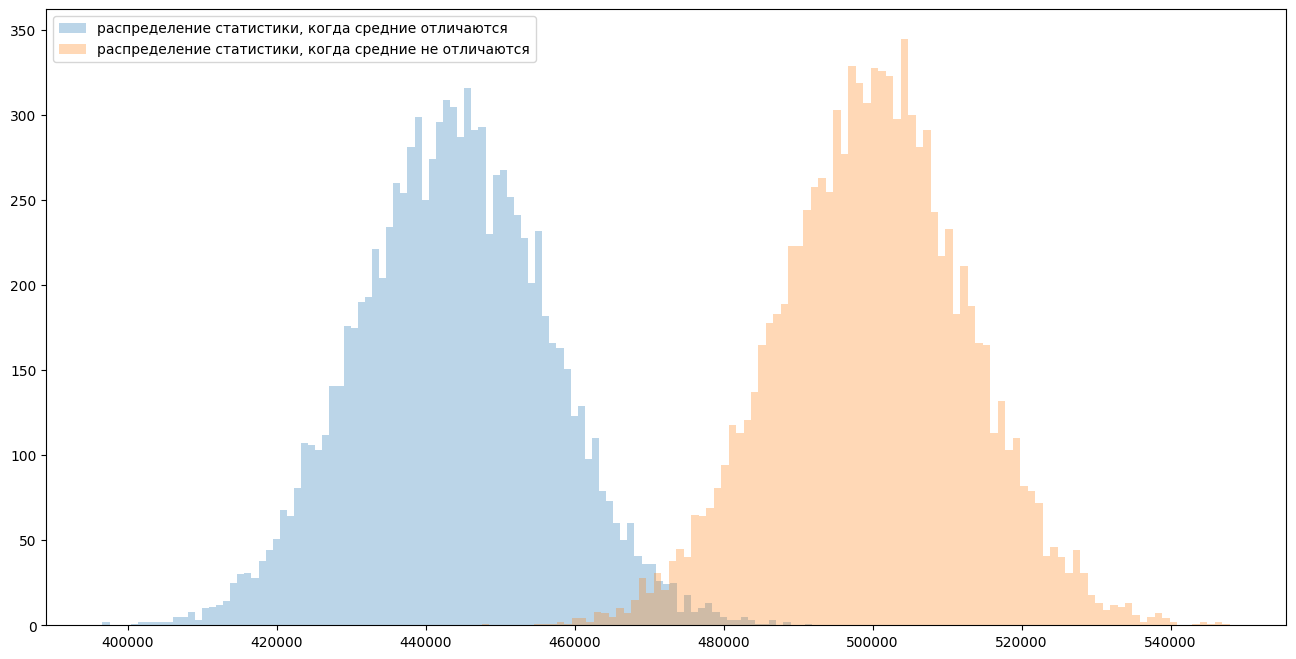

In [25]:
plt.figure(figsize=(16, 8))
plt.hist(stats_diff, bins=100, alpha=0.3,label='распределение статистики, когда средние отличаются')
plt.hist(stats_same, bins=100, alpha=0.3, label='распределение статистики, когда средние не отличаются')
plt.legend()
plt.show()

## Сплитовалка

In [38]:
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('sample_data.csv')
data.head()

,uid,avg_turnover_rub_1_month,avg_turnover_rub_3_month,avg_turnover_rub_6_month,pnl_rub
0,18601,-0.076177,-0.080479,-0.080746,0.04
1,14844,-0.076177,-0.031342,-0.040946,0.05
2,18625,-0.076177,-0.080479,-0.020223,0.07
3,1991,-0.076177,-0.080479,-0.078606,0.09
4,10426,-0.076177,-0.068225,-0.065865,0.11


## Разобьем очень странным способом. Половину выборки в одну группу, другую в другую

In [31]:
data['treatment'] = [0] * (len(data) // 2) + [1] * (len(data) // 2  + 1)
data.head()

,uid,avg_turnover_rub_1_month,avg_turnover_rub_3_month,avg_turnover_rub_6_month,pnl_rub,treatment
0,18601,-0.076177,-0.080479,-0.080746,0.04,0
1,14844,-0.076177,-0.031342,-0.040946,0.05,0
2,18625,-0.076177,-0.080479,-0.020223,0.07,0
3,1991,-0.076177,-0.080479,-0.078606,0.09,0
4,10426,-0.076177,-0.068225,-0.065865,0.11,0


### Возьмем тритмент группу (тестовую) и контрольную группу и проведем между ними т-тест


In [32]:
treated_group = data.loc[data['treatment'] == 1]['pnl_rub']
control_group = data.loc[data['treatment'] == 0]['pnl_rub']
stat, p = ttest_ind(treated_group, control_group)

stat, p

(np.float64(9.46761481578222), np.float64(3.1389278542200025e-21))

Получили, что группы различаются (на самом деле это из-за того, что в исходном файле записи отсортированы по PnL)

## Разобьем с солью и хешем

**Остаток от деления тоже не всегда круто работает, поэтому тут реализован чуть более крутой способ**  

Если проводим много тестов в большой компании, то лучше так. Если тестов мало, то и остаток от деления в принципе ок

In [40]:
from tqdm import tqdm_notebook
import hashlib
import pandas
import scipy.stats
from sklearn.metrics import mutual_info_score
import statsmodels.api as sm

def ab_split(id, salt, control_group_size):
    '''
    Returns 't' (for test) or 'c' (for control), based on the ID and salt.
    The control_group_size is a float, between 0 and 1, that sets how big the
    control group is.
    '''
    # добавляем соль к ID
    test_id = str(id) + '-' + str(salt)

    # хэш от ID с солью, переводится в 10-чную систему
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()

    # берем от этого первые 6 знаков
    test_id_first_digits = test_id_digest[:6]

    # переводим в 16-чную
    test_id_final_int = int(test_id_first_digits, 16)

    # делим на самое большое число в 16-чной системе
    # получаем число от 0 до 1
    ab_split = (test_id_final_int/0xFFFFFF)

    if ab_split > control_group_size:
        return 0
    else:
        return 1

Пример того, что получается на каждом этапе:

In [42]:
id_ex = 18601
salt_ex = 'test-1'
control_group_size_ex = 0.5

test_id_ex = str(id_ex) + '-' + str(salt_ex)
print(f'test_id: {test_id_ex}')

# хэш от ID с солью, переводится в 16-чную систему
test_id_digest_ex = hashlib.md5(test_id_ex.encode('ascii')).hexdigest()
print(f'test_id_digest: {test_id_digest_ex}')

# берем от этого первые 6 знаков
test_id_first_digits_ex = test_id_digest_ex[:6]
print(f'test_id_first_digits: {test_id_first_digits_ex}')

# переводим в 16-чную
test_id_final_int_ex = int(test_id_first_digits_ex, 16)
print(f'test_id_final_int: {test_id_final_int_ex}')

# делим на самое большое число в 16-чной системе
# получаем число от 0 до 1
ab_split_ex = (test_id_final_int_ex/0xFFFFFF)
print(f'ab_split: {ab_split_ex}')


test_id: 18601-test-1
test_id_digest: ed82d108ea8fc9b21358ecf4ddd3d9ae
test_id_first_digits: ed82d1
test_id_final_int: 15565521
ab_split: 0.9277774052487258


In [43]:
# сплитуем пользователей этой функцией
data['treatment_with_salt'] = data.uid.apply(lambda uid: ab_split(uid, 'test-1', 0.5))

### Проведем снова тест и увидим, что даже случайным разбиением группы по средним похожи (не отвергается 0 гипотеза о равенстве средних при уровне значимости 0.05)

In [44]:
treated_group = data.loc[data['treatment_with_salt'] == 1]['pnl_rub']
control_group = data.loc[data['treatment_with_salt'] == 0]['pnl_rub']
stat, p = ttest_ind(treated_group, control_group)

stat, p

(np.float64(1.496659096520079), np.float64(0.13449616176504262))

# A/A тесты

## Тест, который сходится

In [45]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
# np.random.seed(42)

  0%|          | 0/1000 [00:00<?, ?it/s]

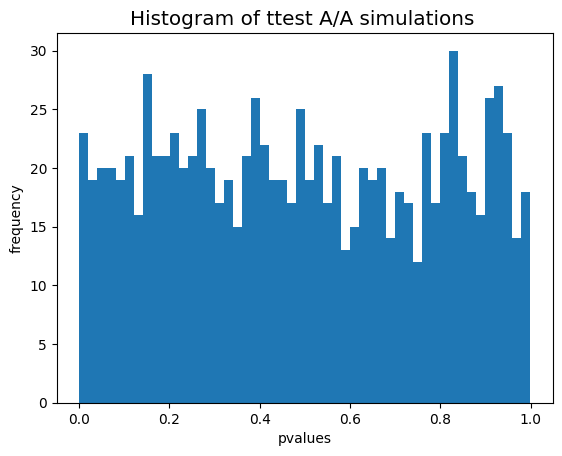

np.float64(0.052)

In [46]:
n = 100_000         # размер исходной выборки
simulations = 1000  # кол-во симуляций
n_s = 1000          # размер подвыборки
res = []            # сюда будем сохранять результаты

# берем 2 похожие группы
df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):

    # берем подвыборки
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values

    # сохраняем pvalue
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

# рисуем распределение p-value
plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [48]:
# Проверяем О1Р (количество ложноположительных прокрасов при условии, что различий нет)
sum(np.array(res) < 0.05) / simulations

np.float64(0.052)

Проверим тестом Колмогорова, что распределение p-value равномерное

In [49]:
from scipy.stats import kstest, uniform

def is_uniform(sample, significance_level):
    # Perform the Kolmogorov-Smirnov test
    _, p_value = kstest(sample, uniform.cdf)

    return p_value

significance_level = 0.05
# Example usage
p_value = is_uniform(res, significance_level)

if p_value > significance_level:
    print("Uniform")  # Sample distribution is likely uniform
else:
    print("Not Uniform")  # Sample distribution is not likely uniform

p_value

Uniform


np.float64(0.8202433919693009)

## A/A-тест не сходится


  0%|          | 0/1000 [00:00<?, ?it/s]

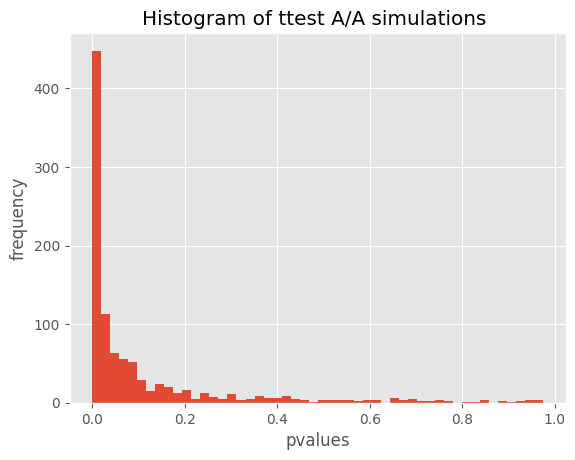

np.float64(0.598)

In [50]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n) * 1.1 # добавляем эффект 10%
})

for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) < significance_level) / simulations

In [51]:
# FPR не сойдется
sum(np.array(res) < significance_level) / simulations

np.float64(0.598)

In [52]:
significance_level = 0.05
# Example usage
p_value = is_uniform(res, significance_level)

if p_value > significance_level:
    print("Uniform")  # Sample distribution is likely uniform
else:
    print("Not Uniform")  # Sample distribution is not likely uniform

p_value

Not Uniform


np.float64(0.0)

## A/A-тест через бутстрап

  0%|          | 0/1000 [00:00<?, ?it/s]

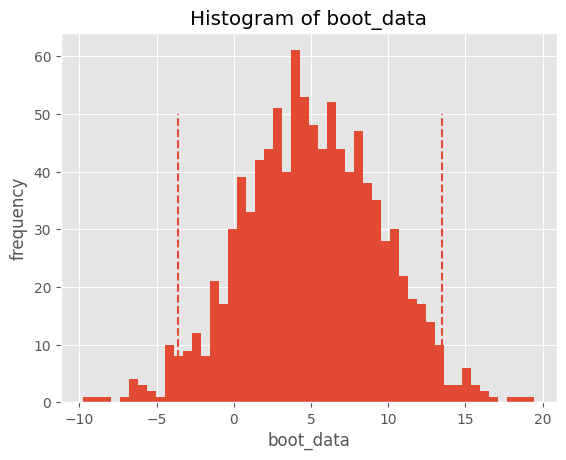

Выборочные средние:  1004.9108128522288 999.7588896209534
ci                0
0.025  -3.619293
0.975  13.466961
p-value 0.25370847905733085
FPR:  0.0


In [59]:
from scipy.stats import norm, mannwhitneyu

n = 100000
simulations = 1000
n_s = 1000
res = []
statistic = np.mean
bootstrap_conf_level = 0.95

# берем 2 похожие группы
df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

boot_data = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):

    # берем бутстраповские подвыборки (того же размера, с возвращением)
    s1 = df['s1'].sample(n, replace=True).values
    s2 = df['s2'].sample(n, replace=True).values

    # сохраняем разницу в статистике
    boot_data.append(statistic(s1) - statistic(s2))

pd_boot_data = pd.DataFrame(boot_data)

# строим доверительный интервал для разницы в средних
left_quant = (1 - bootstrap_conf_level) / 2
right_quant = 1 - (1 - bootstrap_conf_level) / 2
ci = pd_boot_data.quantile([left_quant, right_quant])

# считаем p-value (я пока не особо понял, как)
p_1 = norm.cdf(
    x=0,
    loc=np.mean(boot_data),
    scale=np.std(boot_data)
)

p_2 = norm.cdf(
    x=0,
    loc=-np.mean(boot_data),
    scale=np.std(boot_data)
)

p_value = min(p_1, p_2) * 2

# Визуализация
plt.hist(pd_boot_data[0], bins=50)

plt.style.use('ggplot')
plt.vlines(ci, ymin=0, ymax=50, linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()

print('Выборочные средние: ', df.s1.mean(), df.s2.mean())
print('ci', ci)
print('p-value', p_value)
print('FPR: ', sum(np.array(res) < 0.05) / simulations)
